In [1]:
# dependencies

import pandas as pd

import csv

from IPython.display import Image, SVG

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
np.random.seed(0)

import os

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist

from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages

In [2]:
# Attribute Information from Richard Forsyth, based on the *Collins Gem Guide to Flags* (1986):
# https://archive.ics.uci.edu/ml/datasets/Flags
#    1. name:       Name of the country

#    2. landmass:
#                   1=N.America
#                   2=S.America
#                   3=Europe
#                   4=Africa
#                   5=Asia
#                   6=Oceania

#    3. zone: Geographic quadrant, based on Greenwich and the Equator
#                   1=NE
#                   2=SE
#                   3=SW
#                   4=NW

#    4. area:       in thousands of square km

#    5. population: in round millions

#    6. language:
#                   1=English
#                   2=Spanish
#                   3=French
#                   4=German
#                   5=Slavic
#                   6=other Indo-European
#                   7=Chinese
#                   8=Arabic 
#                   9=Japanese/Turkish/Finnish/Magyar
#                  10=other

#    7. religion:
#                   0=Catholic
#                   1=Other Christian
#                   2=Muslim
#                   3=Buddhist
#                   4=Hindu
#                   5=ethnic
#                   6=Marxist
#                   7=other

#    8. bars:       number of vertical bars in the flag

#    9. stripes:    number of horizontal stripes in the flag

#   10. colours:    number of different colours in the flag

#   11. red:        0 if red absent, 1 if red present in the flag

#   12. green:      same for green

#   13. blue:       same for blue

#   14. gold:       same for gold (also yellow)

#   15. white:      same for white

#   16. black:      same for black

#   17. orange:     same for orange (also brown)

#   18. mainhue:    predominant colour in the flag (tie-breaks decided by taking the topmost hue,
#                   if that fails then the most central hue, and if that fails the leftmost hue)

#   19. circles:    number of circles in the flag

#   20. crosses:    number of (upright) crosses

#   21. saltires:   number of diagonal crosses

#   22. quarters:   number of quartered sections

#   23. sunstars:   number of sun or star symbols

#   24. crescent:   1 if a crescent moon symbol present, else 0

#   25. triangle:   1 if any triangles present, else 0

#   26. icon:       1 if an inanimate image present (e.g., a boat), else 0

#   27. animate:    1 if an animate image (e.g., an eagle, a tree, a human hand) is present,
#                   else 0

#   28. text:       1 if any letters or writing on the flag (e.g., a motto or slogan), else 0

#   29. topleft:    color in the top-left corner (moving right to decide tie-breaks)

#   30. botright:   color in the bottom-left corner (moving left to decide tie-breaks)

#   31. area_sq_miles:
#                   converts area in kilometers to area in square miles

#   32. population density:
#                   in people per square mile

In [3]:
df = pd.read_csv("flags.csv", names=['name', 'landmass', 'zone', 'area', 'population', 'language', 'religion', 'bars', 'stripes', 'colors', 'red', 'green', 'blue', 'gold', 'white', 'black', 'orange', 'mainhue', 'circles', 'crosses', 'saltires', 'quarters', 'sunstars', 'crescent', 'triangle', 'icon', 'animate', 'text', 'topleft', 'botright'])
# *population* is in round millions
# *area* is in thousands of square kilometers
df['area_sq_miles'] = df.area * 1000 / 2.59
df['pop_density'] = (df.population * 1000000) / df.area_sq_miles
df.to_csv("flags_with_headers.csv")
df

,name,landmass,zone,area,population,language,religion,bars,stripes,colors,...,sunstars,crescent,triangle,icon,animate,text,topleft,botright,area_sq_miles,pop_density
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,1,0,0,1,0,0,black,green,250193.050193,63.950617
1,Albania,3,1,29,3,6,6,0,0,3,...,1,0,0,0,1,0,red,red,11196.911197,267.931034
2,Algeria,4,1,2388,20,8,2,2,0,3,...,1,1,0,0,0,0,green,white,922007.722008,21.691792
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,1,1,1,0,blue,red,0.000000,NaN
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,blue,red,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Western-Samoa,6,3,3,0,1,1,0,0,3,...,5,0,0,0,0,0,blue,red,1158.301158,0.000000
190,Yugoslavia,3,1,256,22,6,6,0,3,4,...,1,0,0,0,0,0,blue,red,98841.698842,222.578125
191,Zaire,4,2,905,28,10,5,0,0,4,...,0,0,0,1,1,0,green,green,349420.849421,80.132597
192,Zambia,4,2,753,6,10,5,3,0,4,...,0,0,0,0,1,0,green,brown,290733.590734,20.637450


In [4]:
df.describe()

,landmass,zone,area,population,language,religion,bars,stripes,colors,red,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,area_sq_miles,pop_density
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,...,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,1.940000e+02,160.000000
mean,3.572165,2.211340,700.046392,23.268041,5.340206,2.190722,0.453608,1.551546,3.463918,0.788660,...,0.092784,0.149485,1.386598,0.056701,0.139175,0.252577,0.201031,0.082474,2.702882e+05,310.968053
std,1.553018,1.308274,2170.927932,91.934085,3.496517,2.061167,1.038339,2.328005,1.300154,0.409315,...,0.290879,0.435860,4.396186,0.231869,0.347025,0.435615,0.401808,0.275798,8.381961e+05,1201.501182
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,3.000000,1.000000,9.000000,0.000000,2.000000,1.000000,0.000000,0.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.474903e+03,17.685048
50%,4.000000,2.000000,111.000000,4.000000,6.000000,1.000000,0.000000,0.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.285714e+04,70.352753
75%,5.000000,4.000000,471.250000,14.000000,9.000000,4.000000,0.000000,3.000000,4.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.750000,0.000000,0.000000,1.819498e+05,261.232759
max,6.000000,4.000000,22402.000000,1008.000000,10.000000,7.000000,5.000000,14.000000,8.000000,1.000000,...,1.000000,4.000000,50.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.649421e+06,12950.000000


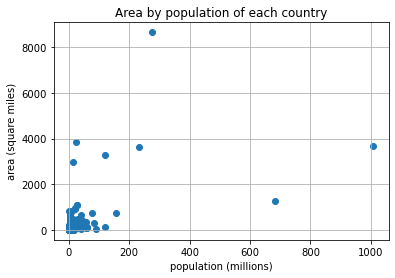

In [5]:
# *population* is in round millions
# *area* is in thousands of square kilometers
x = df.population
y = df.area / 2.59
fig = plt.figure()
ax = plt.axes()
plt.grid()
plt.title("Area by population of each country")
plt.xlabel("population (millions)")
plt.ylabel("area (square miles)")
plt.scatter(x, y)
plt.show()

Visit
https://public.tableau.com/app/profile/paul.bernhardt/viz/flags-of-the-world/Sheet2
and interact with an expanded version of this graph and more visualizations.

In [9]:
X = df[["landmass", "zone", "area", "population", "language", "bars", "stripes", "colors", "red", "green", "blue", "gold", "white", "black", "orange", "mainhue", "circles", "crosses", "saltires", "quarters", "sunstars", "crescent", "triangle", "icon", "animate", "text", "topleft", "botright"]]
y = df["religion"].values.reshape(-1, 1)
print(X.shape, y.shape)

(194, 28) (194, 1)


In [10]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,landmass,zone,area,population,language,bars,stripes,colors,red,green,...,topleft_red,topleft_white,botright_black,botright_blue,botright_brown,botright_gold,botright_green,botright_orange,botright_red,botright_white
65,3,1,249,61,4,0,3,3,1,0,...,0,0,0,0,0,1,0,0,0,0
104,4,2,118,6,10,0,3,3,1,1,...,0,0,0,0,0,0,1,0,0,0
159,1,4,0,0,1,0,0,5,1,1,...,0,0,0,0,0,0,0,0,1,0
78,5,1,1,5,7,0,0,6,1,1,...,0,1,0,1,0,0,0,0,0,0
76,1,4,28,6,3,2,0,2,1,0,...,0,0,0,0,0,0,0,0,1,0


In [11]:
X_test.head()

,landmass,zone,area,population,language,bars,stripes,colors,red,green,...,topleft_red,topleft_white,botright_black,botright_blue,botright_brown,botright_gold,botright_green,botright_orange,botright_red,botright_white
138,3,1,313,36,5,0,2,2,1,0,...,0,1,0,0,0,0,0,0,1,0
16,3,1,31,10,6,3,0,3,1,0,...,0,0,0,0,0,0,0,0,1,0
155,5,1,288,2,8,0,3,4,1,0,...,1,0,1,0,0,0,0,0,0,0
96,5,1,236,3,10,0,3,3,1,0,...,1,0,0,0,0,0,0,0,1,0
68,3,1,132,10,6,0,9,2,0,0,...,0,0,0,1,0,0,0,0,0,0
